# Classification: Invistico Airline  


In [17]:
# Standard operational package imports
import numpy as np
import pandas as pd
# Important imports for modeling and evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [46]:
data = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [47]:
data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Data exploration, Cleaning, and Model Preparation

### Explore the data

In [48]:
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [21]:
data["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [22]:
data["satisfaction"].value_counts(dropna=False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

### Check for missing values

In [23]:
missing_data = data.isnull().sum()
missing_percent = 100 * missing_data / len(data)

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
                      Column  Missing_Count
21  Arrival Delay in Minutes            393


### Check the number of rows and columns in the dataset

In [24]:
data.shape

(129880, 22)

## Drop rows with missing values

In [49]:
df_subset = data.dropna()

missing_after_drop = df_subset.isnull().sum().sum()
print(f"Total missing values after dropping rows: {missing_after_drop}") 

Total missing values after dropping rows: 0


In [50]:
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [27]:
df_subset.shape
df_subset["Type of Travel"].value_counts()

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

### Encode the data

In [51]:
class_map = {
    "Eco" : 1,
    "Eco Plus" : 2,
    "Business" : 3
}
df_subset["Class"] = df_subset["Class"].map(class_map)

/var/folders/bc/8c_34x0545b4gsk20rfhtybm0000gn/T/ipykernel_41827/798016386.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Class"] = df_subset["Class"].map(class_map)


In [52]:
satisfaction_map = {
    "dissatisfied" : 0,
    "satisfied" : 1
}
df_subset["satisfaction"] = df_subset["satisfaction"].map(satisfaction_map)

/var/folders/bc/8c_34x0545b4gsk20rfhtybm0000gn/T/ipykernel_41827/1110744526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["satisfaction"] = df_subset["satisfaction"].map(satisfaction_map)


### Convert categorical columns into numeric

In [53]:
df_subset["Customer Type"].value_counts()
cot_map = {
    "Loyal Customer" : 1,
    "disloyal Customer" : 2
}
df_subset["Customer Type"] = df_subset["Customer Type"].map(cot_map)

tot_map = {
    "Business travel" : 1,
    "Personal Travel" : 2
}
df_subset["Type of Travel"] = df_subset["Type of Travel"].map(tot_map)

/var/folders/bc/8c_34x0545b4gsk20rfhtybm0000gn/T/ipykernel_41827/1496045447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Customer Type"] = df_subset["Customer Type"].map(cot_map)
/var/folders/bc/8c_34x0545b4gsk20rfhtybm0000gn/T/ipykernel_41827/1496045447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Type of Travel"] = df_subset["Type of Travel"].map(tot_map)


### Check column data types

In [54]:
df_subset.dtypes

satisfaction                           int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Create the training and testing data

In [55]:
X = df_subset.drop(columns=["satisfaction"]) 
y = df_subset["satisfaction"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Building

In [56]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

## Results and Evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [34]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82     14696
           1       0.81      0.93      0.87     17676

    accuracy                           0.85     32372
   macro avg       0.86      0.84      0.84     32372
weighted avg       0.85      0.85      0.85     32372



### Plot a confusion matrix

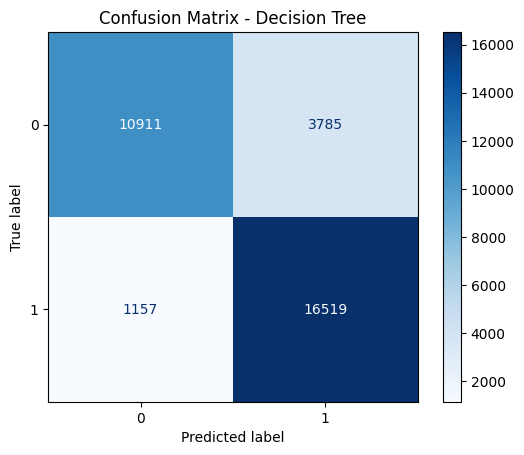

In [35]:
cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()

### Plot the decision tree for visualization

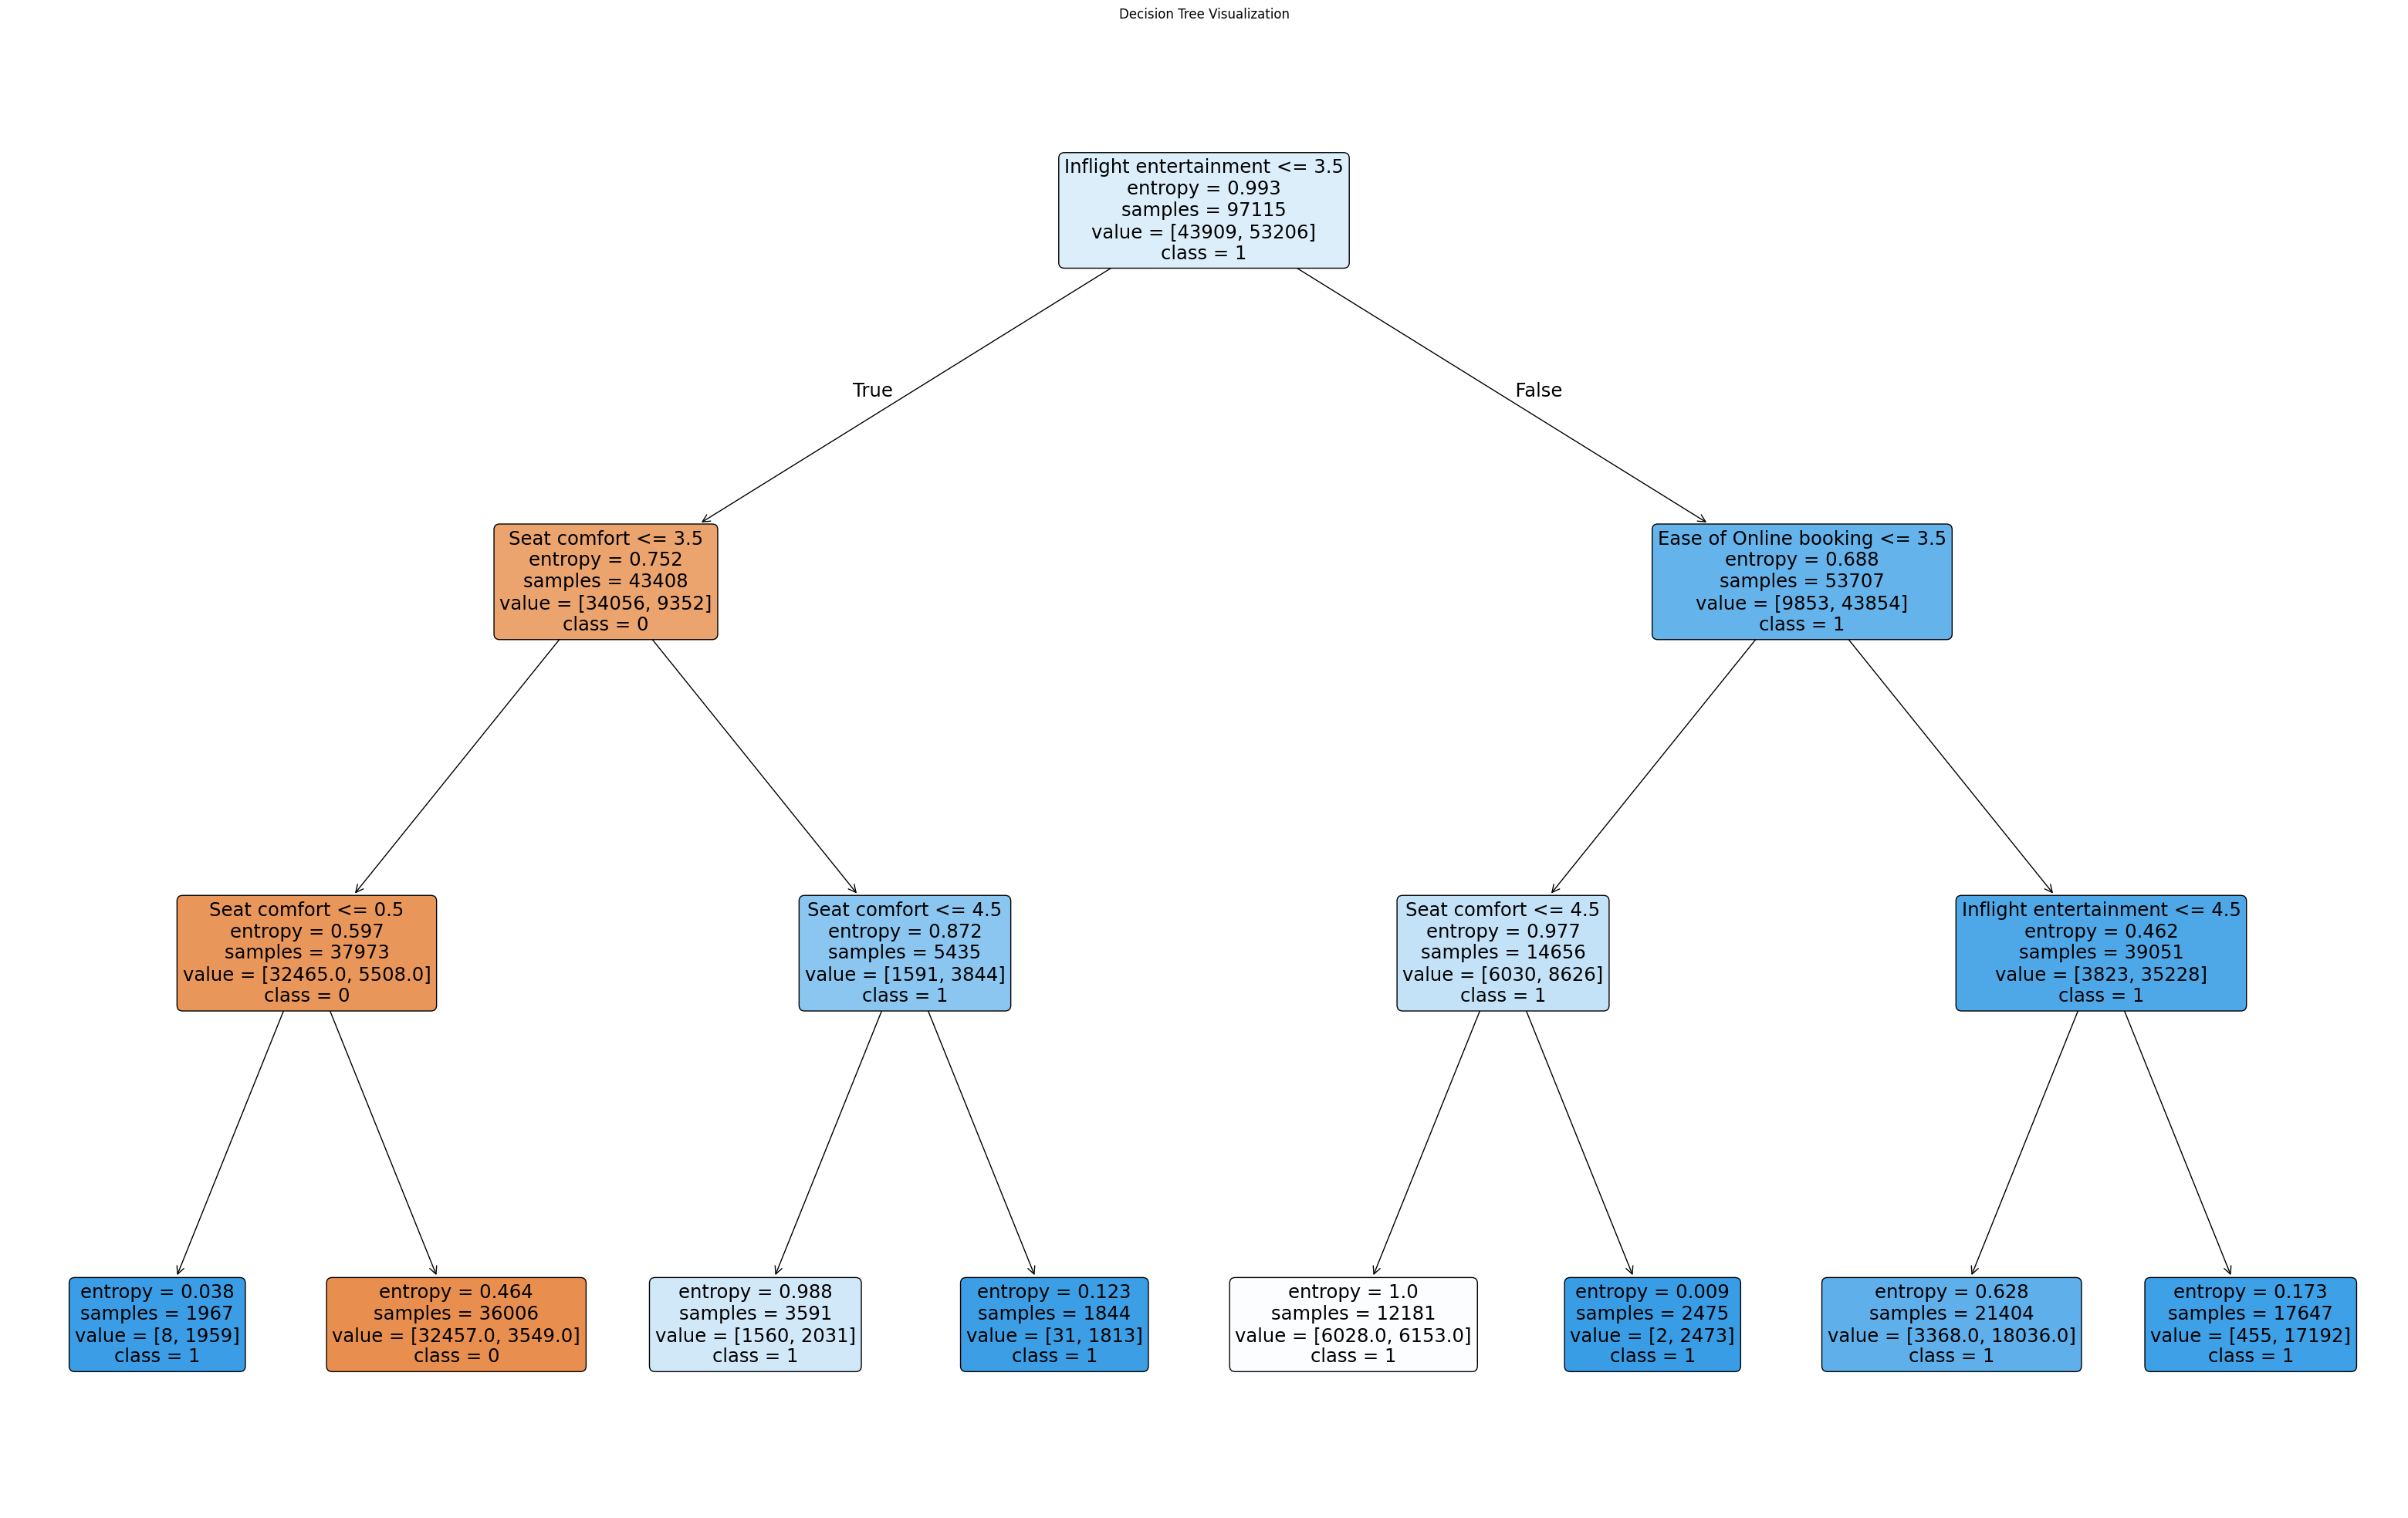

In [36]:
plt.figure(figsize=(40, 25))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(c) for c in decision_tree.classes_],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Build a feature importance graph

Uncover which features might be most important to the decision tree model by building a feature importance graph. 

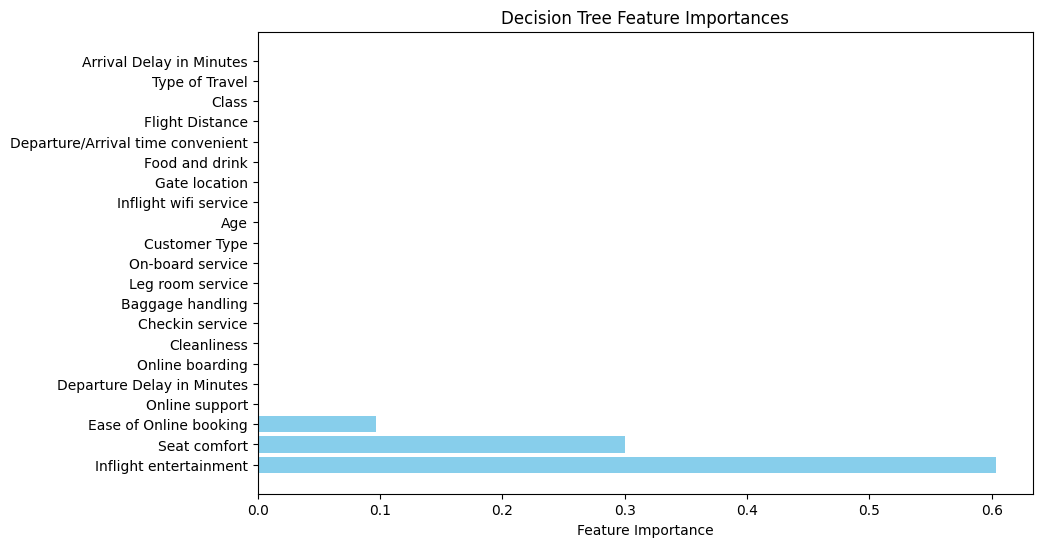

In [37]:
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": decision_tree.feature_importances_
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()

### Hyperparameter tuning  

In [38]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

In [40]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(
    scoring="f1",
    estimator=tuned_decision_tree,
    param_grid=tree_para,
)

clf.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_leaf': [2, 3, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


### Get the best combination of values for the hyperparameters

In [41]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=9, random_state=0)


In [42]:
print(f"Best average validation score: {clf.best_score_}")

Best average validation score: 0.9433246363681645


### Determine the tuned decision tree model's accuracy, precision, recall, and F1 score

In [43]:
best_model = clf.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f"Classification Report: {classification_report(y_test, y_pred_best)}")

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.95      0.93     14696
           1       0.95      0.94      0.94     17676

    accuracy                           0.94     32372
   macro avg       0.94      0.94      0.94     32372
weighted avg       0.94      0.94      0.94     32372



### Plot the tuned decision tree

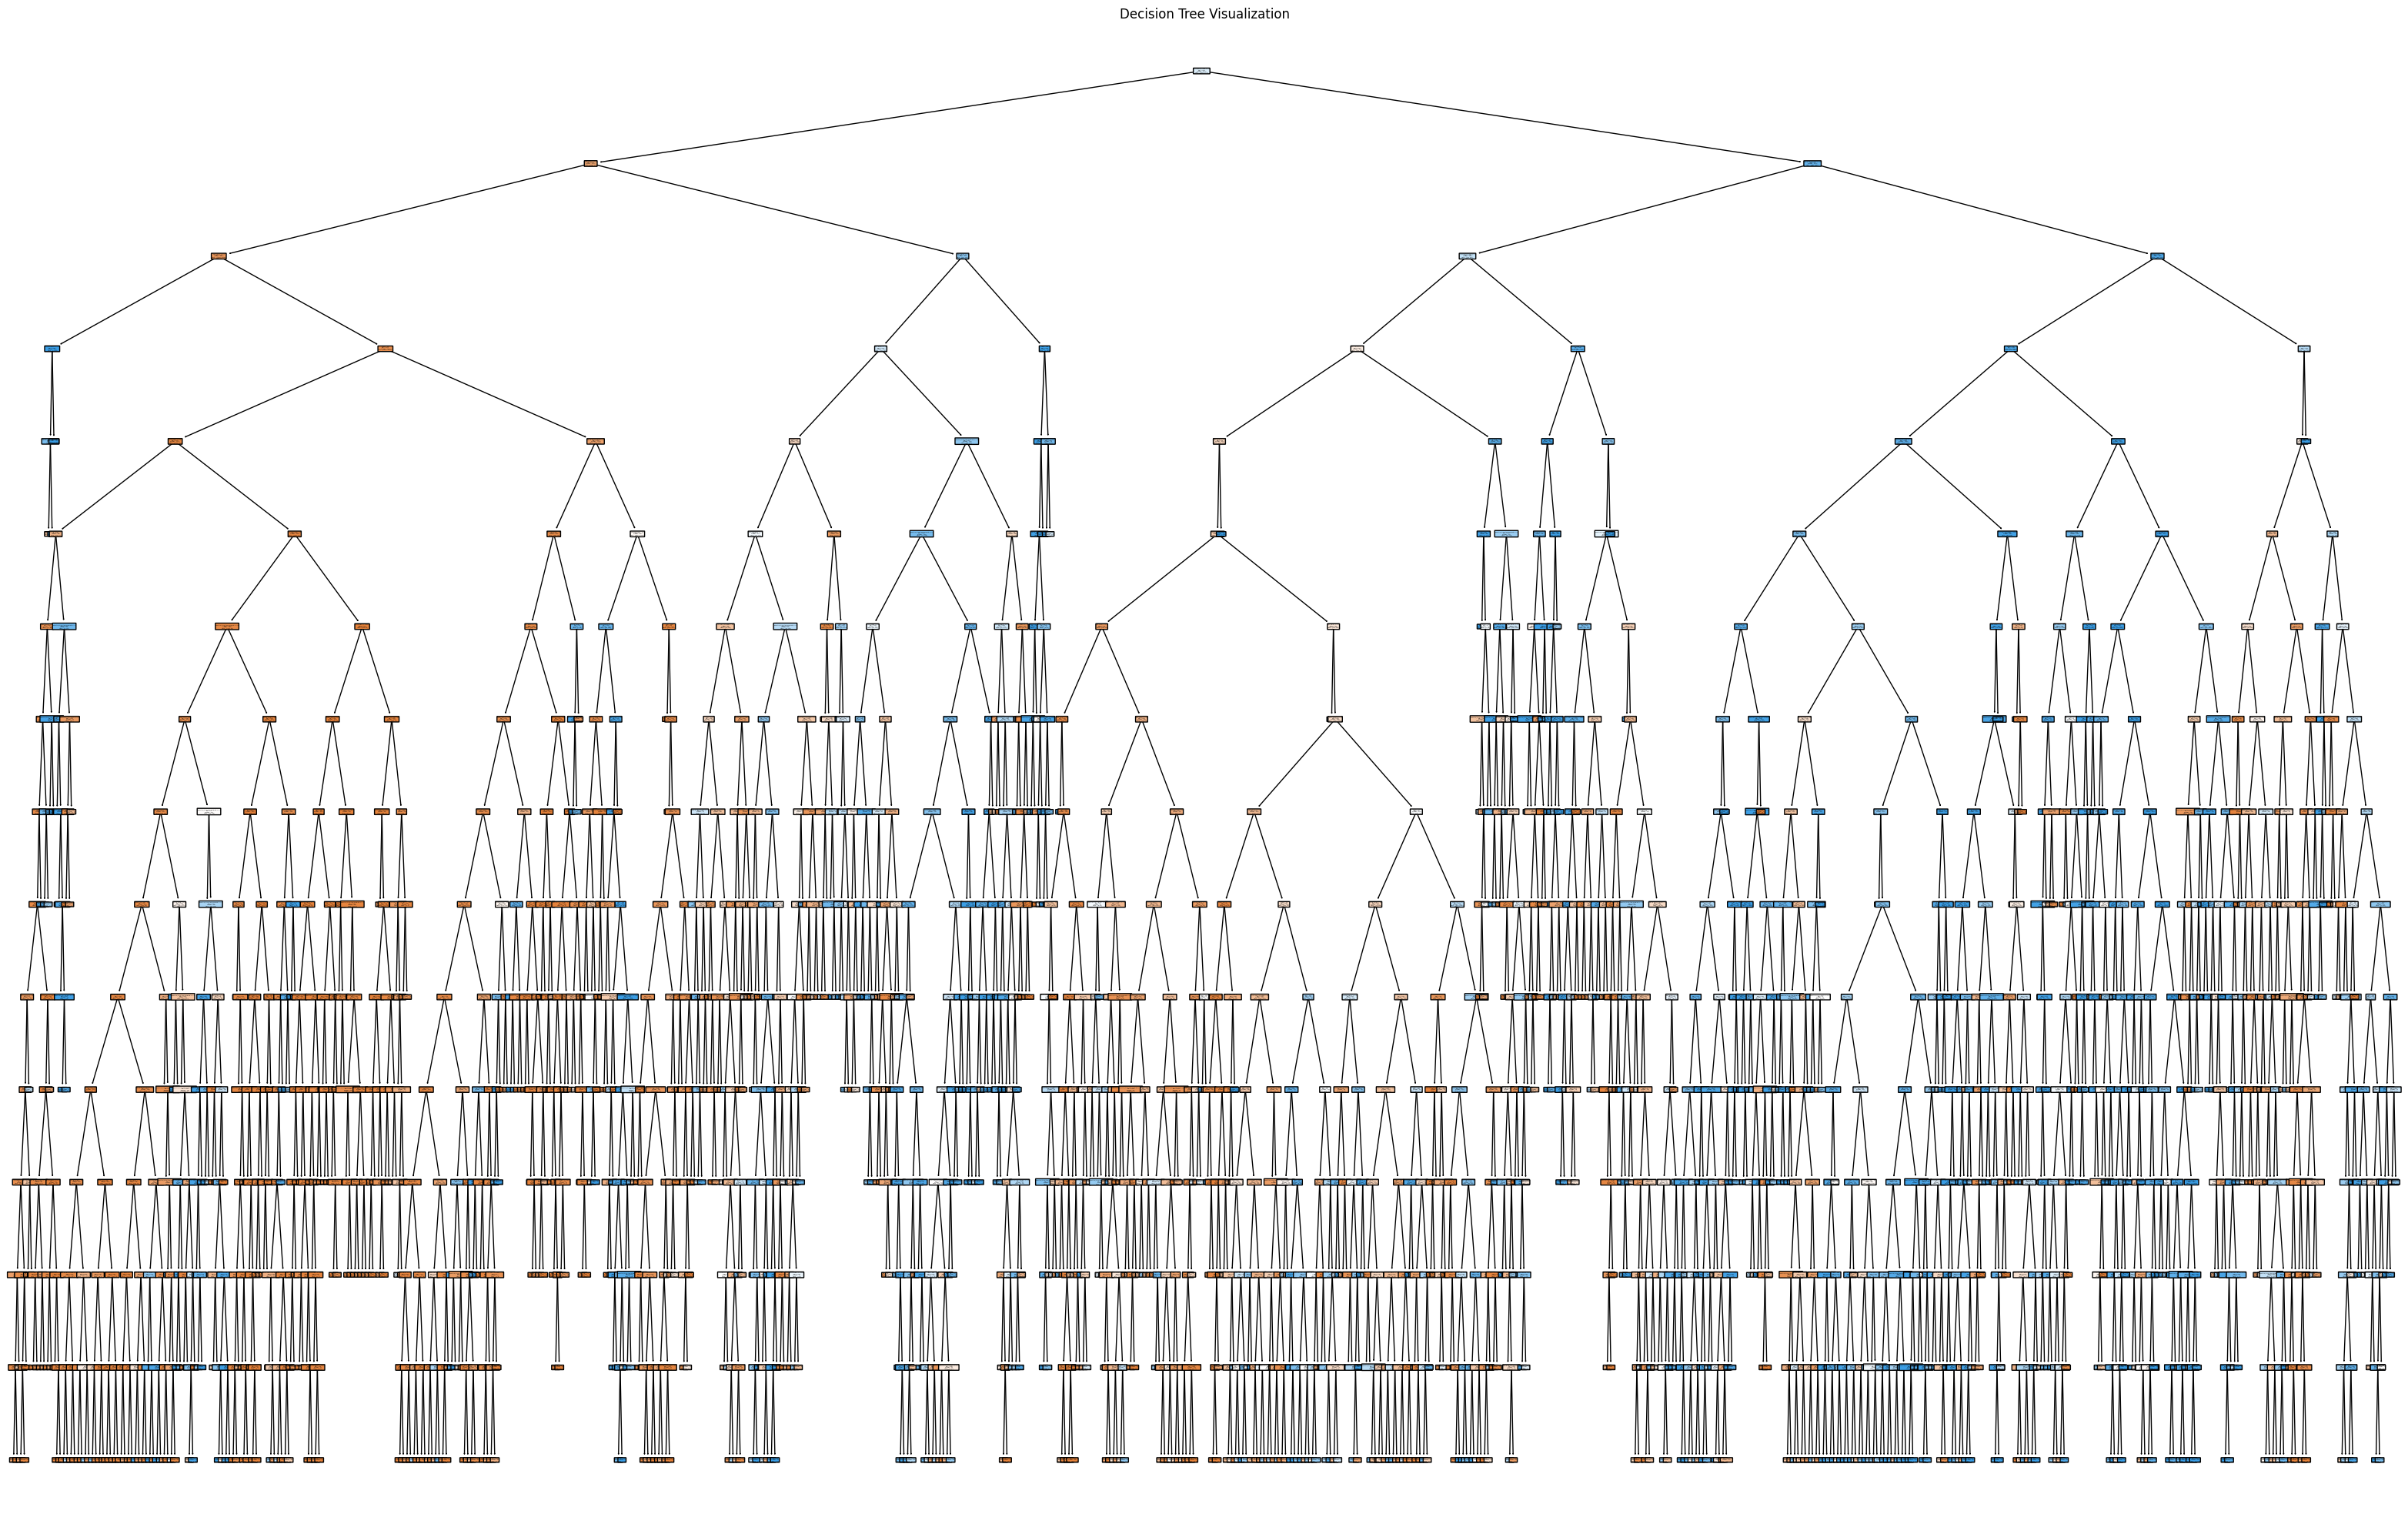

In [44]:
plt.figure(figsize=(40, 25))
plot_tree(best_model, feature_names=X.columns, class_names=[str(c) for c in best_model.classes_],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Build another feature importance graph

<Axes: >

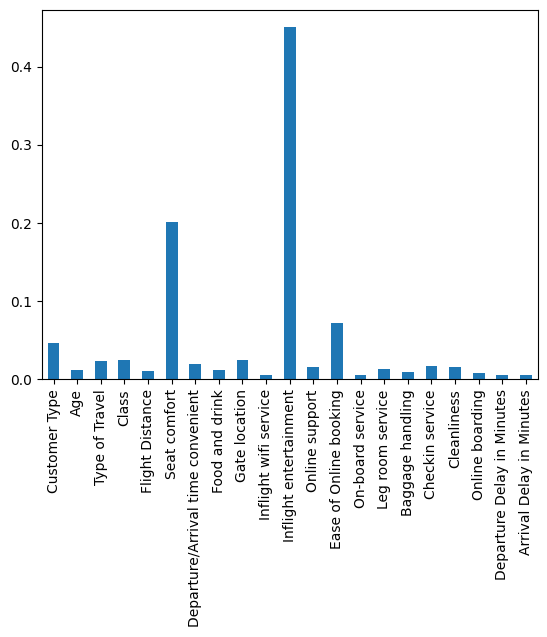

In [45]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)